<a href="https://colab.research.google.com/github/Gethara/ModelTraining/blob/main/fruits_vegitables_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing kaggle library.**

In [19]:
!pip install kaggle

**Uploading the kaggle.json file**

In [20]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
#using API to fetch the dataset from Kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/fruit-and-vegetable-image-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing Libraries**


In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


**Data preprocessing**

Training image pre processing

In [24]:
training_set =tf.keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    )


Found 3115 files belonging to 36 classes.


validation image processing

In [25]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    directory="/content/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    )



Found 351 files belonging to 36 classes.


Building Model

In [26]:
cnn = tf.keras.models.Sequential()

Building convolution layer

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3 , activation ="relu", input_shape= [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3 , activation ="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.5))# to avoid overfitting

In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units = 128, activation ="relu"))

In [32]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation="softmax"))

Compiling and training phase

In [33]:
cnn.compile(optimizer="rmsprop", loss= "categorical_crossentropy", metrics =["accuracy"])

In [35]:
training_history = cnn.fit(training_set,validation_data =validation_set,epochs =30)

Epoch 1/30
98/98 [==============================] - 117s 1s/step - loss: 9.2772 - accuracy: 0.0469 - val_loss: 3.4704 - val_accuracy: 0.0969
Epoch 2/30
98/98 [==============================] - 112s 1s/step - loss: 3.9143 - accuracy: 0.0677 - val_loss: 3.5443 - val_accuracy: 0.1311
Epoch 3/30
98/98 [==============================] - 104s 1s/step - loss: 3.7440 - accuracy: 0.1146 - val_loss: 3.0202 - val_accuracy: 0.2564
Epoch 4/30
98/98 [==============================] - 106s 1s/step - loss: 3.3588 - accuracy: 0.1538 - val_loss: 2.6747 - val_accuracy: 0.3134
Epoch 5/30
98/98 [==============================] - 104s 994ms/step - loss: 3.8598 - accuracy: 0.2138 - val_loss: 9.7304 - val_accuracy: 0.1197
Epoch 6/30
98/98 [==============================] - 112s 1s/step - loss: 3.1604 - accuracy: 0.2636 - val_loss: 2.1562 - val_accuracy: 0.4843
Epoch 7/30
98/98 [==============================] - 104s 1s/step - loss: 2.7366 - accuracy: 0.3422 - val_loss: 2.0054 - val_accuracy: 0.5613
Epoch 8/30

In [36]:
cnn.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
cnn.save("trained_model.keras")

In [38]:
#Recording History
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

In [41]:
print("Training_history:" , training_history.history['val_accuracy'][-1])

Training_history: 0.8860399127006531


Accuracy Visualization

Training Visualization

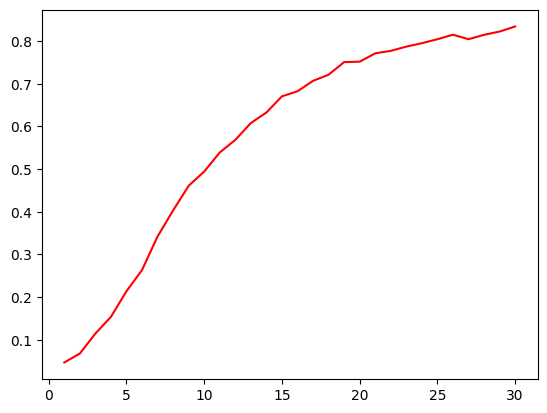

In [44]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history["accuracy"], color="red")

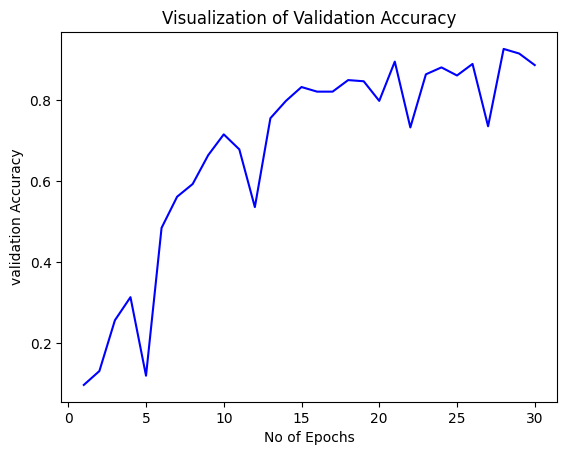

In [47]:
plt.plot(epochs,training_history.history["val_accuracy"], color="blue")
plt.xlabel("No of Epochs")
plt.ylabel("validation Accuracy")
plt.title("Visualization of Validation Accuracy")
plt.show()